<a href="https://colab.research.google.com/github/nazuranajmi/MachineLearning_juyaaaNotes/blob/main/CustomerSegmenation_KmeansJuly2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Segmenation**

**Introduction**

1- What is Customer Segmentation?

2- Business Scenario

3- Explore the Dataset

4- Data Preprocessing

5- K-Means for Segmentation

6- PCA with K-Means for better visualization

7- Conclusion

1. **Introduction**

Let’s say, you decided to buy a t-shirt from a brand online. Have you ever thought that who else bought the same t-shirt?
People, who have similar to you, right? Same age, same hobbies, same gender, etc.
In marketing, Companies basically try to find your t-shirts on other people!
But wait ? How? Of course, with data!
Customer segmentation is that simple!
We actually try to find and group customers based on common characteristics such as age, gender, living area, spending behavior, etc. So that we can market the customers effectively.
Let’s dive into our segmentation project!

2. **Business Scenario**

Suppose we are working as a data scientist for a AAA company and want to segment our customers to help the marketing department for them to launch new products and sales based on the segmentation. Therefore we will save our time and money by marketing a specific group of customers with selected products.
How Did we collect the data by the way?
All data has been collected through the loyalty cards they use at checkout :)
We will utilize K-Means and PCA algorithms for this project and see how we define new grouped customers!

***Understanding Data is Important!***

Before starting any project, We need to understand the business problem and dataset first.
Let’s see the variables(features) in the dataset.

**Variable Description**

ID: Shows a unique identification of a customer.
Sex: Biological sex (gender) of a customer. In this dataset, there are only 2 different options.

0: male

1: female


Marital status: Marital status of a customer.

0: single

1: non-single (divorced / separated / married / widowed)


Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset

18 Min value (the lowest age observed in the dataset)

76 Max value (the highest age observed in the dataset)


Education: Level of education of the customer.

0:other / unknown
1: high school

2: university

3: graduate school

Income: Self-reported annual income in US dollars of the customer.

35832 Min value (the lowest income observed in the dataset)
309364 Max value (the highest income observed in the dataset)

Occupation: Category of occupation of the customer.

0: unemployed/unskilled

1: skilled employee / official

2: management / self-employed / highly qualified employee / officer


Settlement size: The size of the city that the customer lives in.

0: small city
1: mid-sized city
2: big city

We have datasets and know the business problem. Now, Let’s start coding!

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import scipy

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

import warnings
warnings.filterwarnings('ignore')

**Exploring the Dataset**

In [ ]:
df = pd.read_csv('Segmentation Customer.csv')

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.shape

(2000, 8)

In [ ]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


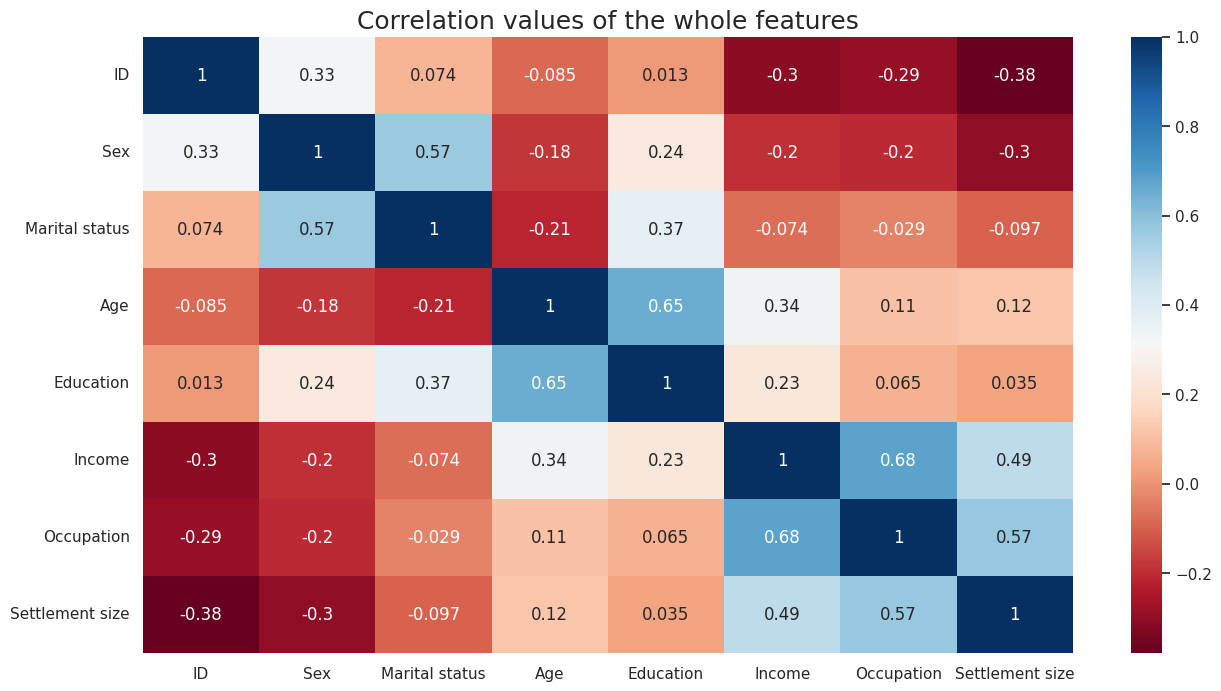

In [ ]:
#using heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation values of the whole features', fontsize=18)
plt.show()

Let’s explore the correlation.
We see that there is a strong correlation between Education and Age.

In other words, older people tend to be more highly educated.
How about income and occupation?
Their correlation is 0.68. That means If you have a higher salary, you are more likely to have a higher-level occupation such as a manager.


Correlation matrix is a very useful tool to analyze the relationship between features.
Now, we understand our dataset and have a general idea of it.
Next section will be the segmentation. But before that, we need to scale our data first.


Text(0.5, 1.0, 'Visualization of raw data')

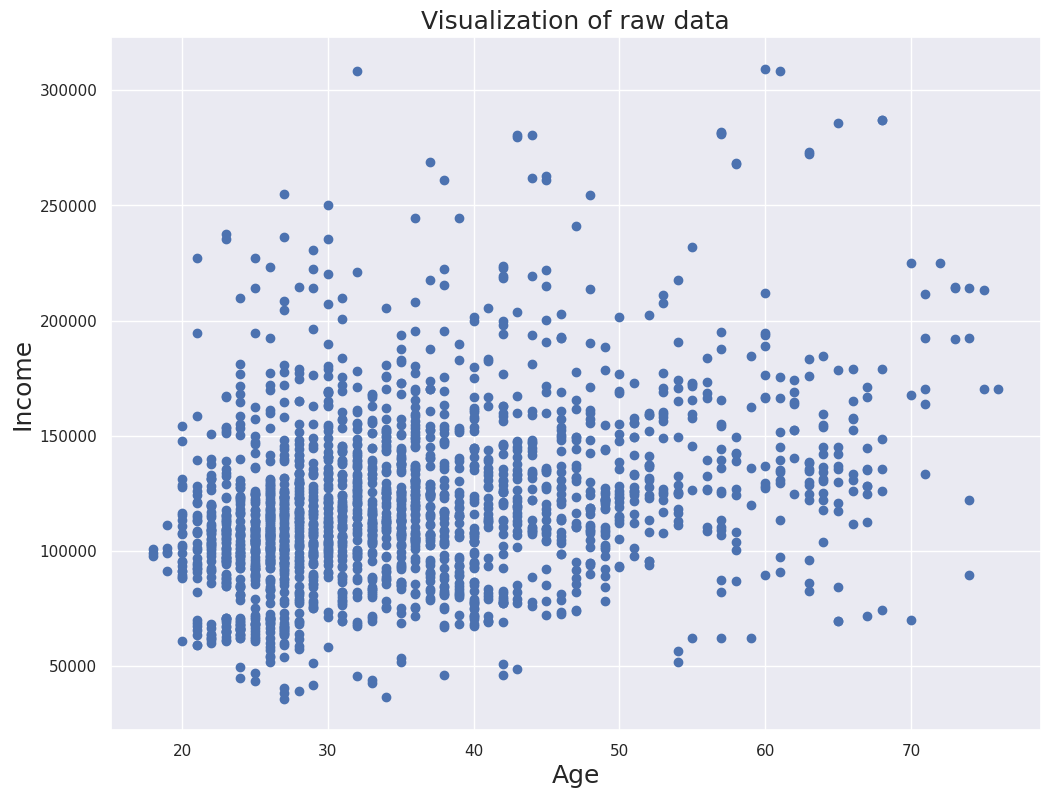

In [ ]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set.
plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 3], df.iloc[:, 5])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=18)
plt.title('Visualization of raw data', fontsize=18)

**Data Preprocessing**

In [ ]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

df_std[:5]

array([[-1.731185  , -0.91739884, -0.99302433,  2.65361447,  1.60432297,
         0.09752361,  0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, -1.18713209, -0.06337243,
         0.78265438,  0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433,  1.11731585, -0.06337243,
        -0.83320224, -1.26952539, -0.90972951],
       [-1.72598885, -0.91739884, -0.99302433,  0.77591616, -0.06337243,
         1.32838624,  0.29682303,  0.32129825],
       [-1.72425679, -0.91739884, -0.99302433,  1.45871554, -0.06337243,
         0.73693175,  0.29682303,  0.32129825]])

In [ ]:
df_std = pd.DataFrame(data = df_std, columns = df.columns)


df_std.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


**K-Means Clustering**

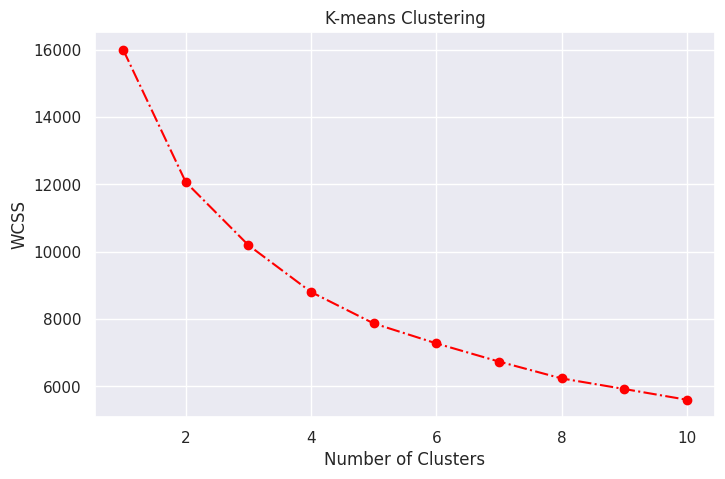

In [ ]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus.
# And we set a random state for reproducibility.
wcss = [] #Within-Cluster Sum of Square
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)



# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The elbow in the graph is the four-cluster mark. This is the only place until which the graph is steeply declining while smoothing out afterward.


Let’s perform K-Means clustering with 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 4, n_init = 4, random_state = 42)

kmeans.fit(df_std)

KMeans(n_clusters=4, n_init=4, random_state=42)

In [ ]:
df_segm_kmeans = df_std.copy()

df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [ ]:
df_segm_kmeans['Segmented_KMeans'] = kmeans.labels_

df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segmented_KMeans
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [ ]:
#EDA

df_segm_kmeans_groubed = df_segm_kmeans.groupby(['Segmented_KMeans']).mean()

df_segm_kmeans_groubed

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segmented_KMeans,,,,,,,,
0,-0.236585,0.056580,0.369972,1.698960,1.814329,0.928253,0.447657,0.421604
1,0.226950,0.854745,1.004057,-0.585630,0.050447,-0.404952,-0.286491,-0.396497
2,0.697055,-0.107716,-0.907103,-0.104064,-0.493232,-0.696787,-0.869527,-0.836279
3,-0.598356,-0.857522,-0.622529,-0.032027,-0.497968,0.493349,0.685336,0.790905


In [ ]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segmented_KMeans'].map({0:'well-off',
                                                                  1:'fewer opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})


df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segmented_KMeans,Labels
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,1,fewer opportunities
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,2,standard
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


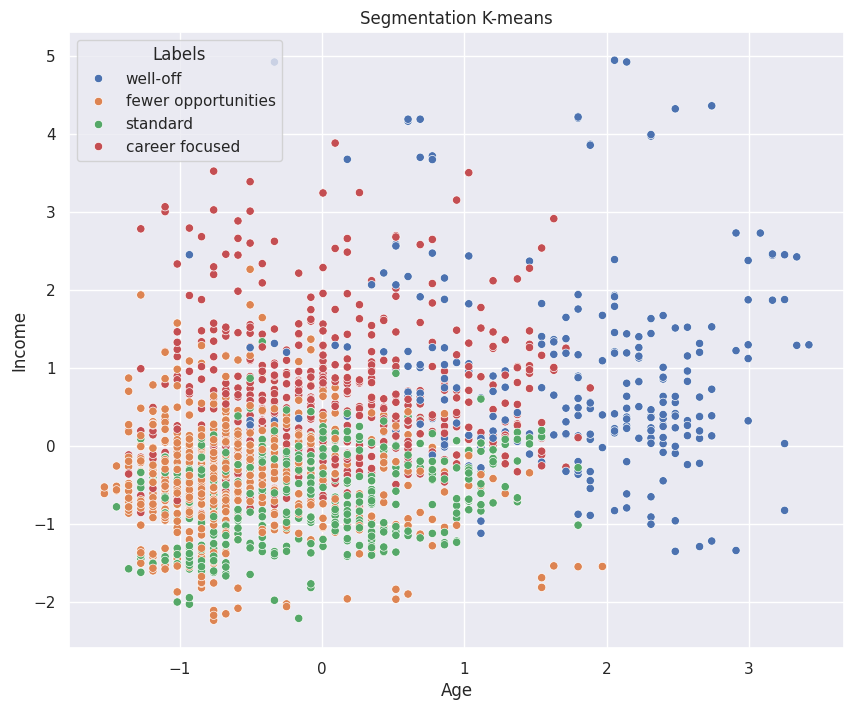

In [ ]:
# We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
sns.scatterplot(data=df_segm_kmeans, x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'])
plt.title('Segmentation K-means')
plt.show()